In [2]:
# Install libraries if needed
# !pip install sklearn --user
# !pip install tensorflow --user
# !pip install pydot --user

In [3]:
#Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydot


import matplotlib.pyplot as plt # plotting library

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
import keras

2024-11-02 13:59:39.498286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 13:59:39.507858: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 13:59:39.594509: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 13:59:39.665996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730581179.732633   11714 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730581179.75

## MNIST 

In [4]:
# MNIST is a collection of handwritten digits ranging from the number 0 to 9. 
# It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.
# To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically. 
# The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.

47040000


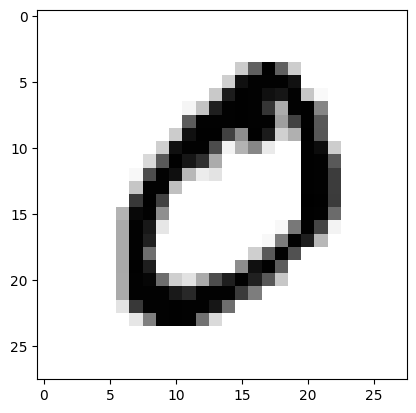

In [5]:
# We start by loading the MNIST dataset using TensorFlow’s Keras API. This dataset is divided into training and testing sets. We visualize a sample image from the dataset to get a sense of the data we’re working with.
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

#Checking size of trining set
print(X_train.size)

plt.imshow(X_train[1], cmap=plt.cm.binary)

In [6]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}

Test labels:  {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


## Data visualization

2
9
5
6
5
9
7
9
7
1
3
9
1
0
9
1
8
1
4
8
4
0
5
9
4


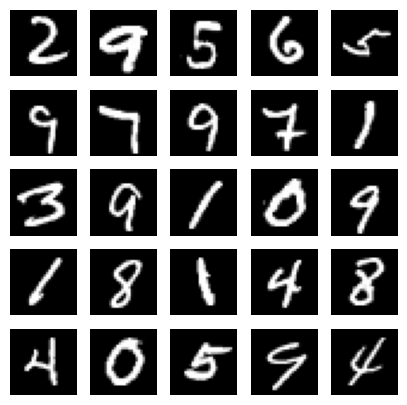

In [10]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    print(labels[i])
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Designing model architecture using Keras

In [10]:
# The MLP model, discussed above can be used for MNIST digits classification.
# When the units or perceptrons are exposed, the MLP model is a fully connected network.
# The following code shows how to design the MLP model architecture using Keras.
# The first step in designing the model architecture is to import the Keras layers. This can be done as follows:

In [11]:
# import Keras Layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [12]:

# Now, the data must be in the correct shape and format.
# After loading the MNIST dataset, the number of labels is computed as:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


## One-Hot Encoding

In [13]:
# At this point, the labels are in digits format, 0 to 9.
# This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.
# A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.
# For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.
# The following lines convert each label into a one-hot vector:

# convert to one-hot vector
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#print some values
print(y_train[0])
print(y_test_encoded[0])

#print some values
print(y_train[1])
print(y_test_encoded[1])

#print some values
print(y_train[2])
print(y_test_encoded[2])

#print some values
print(y_train[3])
print(y_test_encoded[3])


5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Data Processing


In [14]:
# In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.
# The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.
# The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.
# The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

In [17]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [21]:
# resize and normalize
x_train = np.reshape(X_train, [-1, input_size])
print(len(x_train[0]) , "\n\n\n")
x_train = x_train.astype('float32') / 255
print(x_train[0])
x_test = np.reshape(X_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

784 



[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## Setting Neural Network Parameters


In [17]:
# The batch_size argument indicates the number of data that we will use for each update of the model parameters.
# Hidden_units shows the number of hidden units.
# Dropout is the dropout rate

In [18]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

## Design the model architecture

In [19]:
# The next step is to design the model architecture. The proposed model is made of three MLP layers.
# In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.
# Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.
# 256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.
# The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.
# The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:
# from keras.models import Sequential
# model = Sequential()
# The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.
# In Keras, we can add the required types of layers through the add() method.

In [20]:
# 3-layer MLP with ReLU and dropout after each layer:
#####################################################
# Refers to a Multilayer Perceptron (MLP) neural network consisting of three hidden layers, where each layer utilizes the ReLU activation function and is followed by a dropout layer to prevent overfitting; essentially, after each layer of computation, some neurons are randomly dropped out during training, forcing the network to learn more robust features. 
# Key points about this model: 
# Three layers: An input layer, one hidden layer, and an output layer. 
# ReLU activation: Each layer uses the Rectified Linear Unit (ReLU) activation function, which is commonly used for its computational efficiency and ability to mitigate the vanishing gradient problem. 
# Dropout after each layer: A dropout layer is added after each hidden layer, randomly dropping out a certain percentage of neurons during training to improve generalization

In [21]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/home/trashc/Projects/Jupyter Notebooks/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1729909524.389690   15972 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
# View model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

## Implement MLP model using Keras 

In [23]:
# Loss function (categorical_crossentropy)
##########################################
# How far the predicted tensor is from the one-hot ground truth vector is called loss.
# In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.
# There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.
# For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

# Optimization (optimizer adam)
################################
# With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.
# In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).
# Each optimizer features tunable parameters like learning rate, momentum, and decay.
# Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

# Metrics (accuracy)
#####################
# Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.
# During training, validation, and testing, other metrics such as accuracy can also be included.
# Accuracy is the percent, or fraction, of correct predictions based on ground truth.

In [24]:
#Compile the model with compile() method 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# Train the model with fit() method
model.fit(x_train, y_train_encoded, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7620 - loss: 0.7449
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.2016
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 0.1565
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9599 - loss: 0.1312
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1139
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1035
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9694 - loss: 0.0998
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0822
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0815
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0779
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0703
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [27]:
# Evaluating model performance with evaluate() method 
loss, acc = model.evaluate(x_test, y_test_encoded, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0738

Test accuracy: 98.3%


In [28]:
print("hello world!")

hello world!
